In [1]:
# 单元格1: 导入和设置
import sys
import os
sys.path.append('../src')  # 添加src目录到Python路径

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入自定义模块
from data_loader import data_loader
from data_cleaner import data_cleaner
from analyzer import data_analyzer
from visualizer import data_visualizer
from config import PROCESSED_DATA_PATH

print("=== 数据清洗与探索性分析 ===")
print("项目结构验证完成，开始数据分析...")

=== DAY 2: 数据清洗与探索性分析 ===
项目结构验证完成，开始数据分析...


In [2]:
# 单元格2: 数据加载
print("步骤1: 数据加载")
df_raw = data_loader.load_with_sampling(sample_size=500000)
data_loader.validate_data_structure(df_raw)

print(f"\n原始数据概览:")
print(f"  数据形状: {df_raw.shape}")
print(f"  内存使用: {df_raw.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

步骤1: 数据加载
大数据集抽样加载
正在计算数据量...
记录总行数: 100,150,806
数据加载完成:500,001条记录
加载时间:459.04秒

数据结构验证
数据形状:(500001, 5)
列名['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp']
数据验证通过

原始数据概览:
  数据形状: (500001, 5)
  内存使用: 39.65 MB


In [3]:
# 单元格3: 数据质量检查
print("步骤2: 数据质量检查")
quality_report = data_cleaner.generate_quailty_report(df_raw)

步骤2: 数据质量检查
===数据质量检查===
数据形状(500001, 5)
内存使用39.65MB
重复行使用0

缺失值统计:


In [4]:
# 单元格4: 数据清洗流程
print("步骤3: 数据清洗")

# 优化数据类型
df_optimized = data_cleaner.optimize_data_types(df_raw)

# 创建时间特征
df_with_features = data_cleaner.create_time_features(df_optimized)

# 执行数据清洗
df_cleaned = data_cleaner.clean_data(df_with_features)

print(f"\n清洗完成!")
print(f"  最终数据量: {len(df_cleaned):,} 条记录")
print(f"  列数: {len(df_cleaned.columns)}")

步骤3: 数据清洗

数据类型使用
内存节省了:29.64MB

时间特征工程
timestamp统计信息:
count    5.000010e+05
mean     1.511942e+09
std      7.166719e+06
min     -1.270648e+09
25%      1.511761e+09
50%      1.511965e+09
75%      1.512179e+09
max      1.762116e+09
Name: timestamp, dtype: float64

异常timestamp（小于1000000000或大于31553789759）:
[-1270647847, -1270647815, -1270647178, 1065008]

过滤异常timestamp后，剩余数据量: 499997 条
时间范围:2014-01-02 03:52:18到:2025-11-02 20:41:46
覆盖天数:4322天
时间特征创建完成: ('datetime', 'date', 'hour', 'day_of_week', 'month', 'day', 'is_weekend', 'month', 'day')

数据清洗
删除重复值:0行
清洗后的数据:499997条
数据保留率:inf%

清洗完成!
  最终数据量: 499,997 条记录
  列数: 12


D:\新建文件夹\电商用户行为分析\src\data_cleaner.py:143: RuntimeWarning: divide by zero encountered in scalar divide
  retention_rate=final_count/initial_count*100


In [5]:
# 单元格5: 保存清洗后的数据
print("步骤4: 保存数据")
df_cleaned.to_csv(PROCESSED_DATA_PATH, index=False)
print(f"✅ 清洗后的数据已保存至: {PROCESSED_DATA_PATH}")

步骤4: 保存数据
✅ 清洗后的数据已保存至: D:\新建文件夹\电商用户行为分析\data\processed


In [6]:
# 单元格6: 探索性分析
print("步骤5: 探索性分析")

# 基础统计分析
basic_results = data_analyzer.basic_analysis(df_cleaned)

# 用户行为分析
user_analysis = data_analyzer.user_behavior_analysis(df_cleaned)

# 时间分析
time_analysis = data_analyzer.time_based_analysis(df_cleaned)

# 整合分析结果
analysis_results = {
    'basic': basic_results,
    'user_analysis': user_analysis,
    'time_analysis': time_analysis
}

步骤5: 探索性分析
基础统计分析
用户行为分析
pv:447,816次89.56%
cart:27,583次5.52%
fav:14,479次2.90%
buy:10,119次2.02%

基础指标
总用户数346,424
总商品数295,252
总类目数5,715
总行为数499,997
用户活跃度统计
  平均每个用户行为数: 1.4
  平均活跃天数: 1.3
  平均浏览商品数: 1.4
  最活跃用户行为数: 12

用户价值分层:
中等价值用户:258478 (74.61%)
时间维度分析
时间模型发现:
  高峰时段: 13点 (41,578次行为)
  周末活跃比例: 47.0%


步骤6: 数据可视化
生成探索性分析图表


D:\新建文件夹\电商用户行为分析\src\visualizer.py:157: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekend_behavior = df.groupby(['is_weekend', 'behavior_type']).size().unstack(fill_value=0)


TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'box_inches'

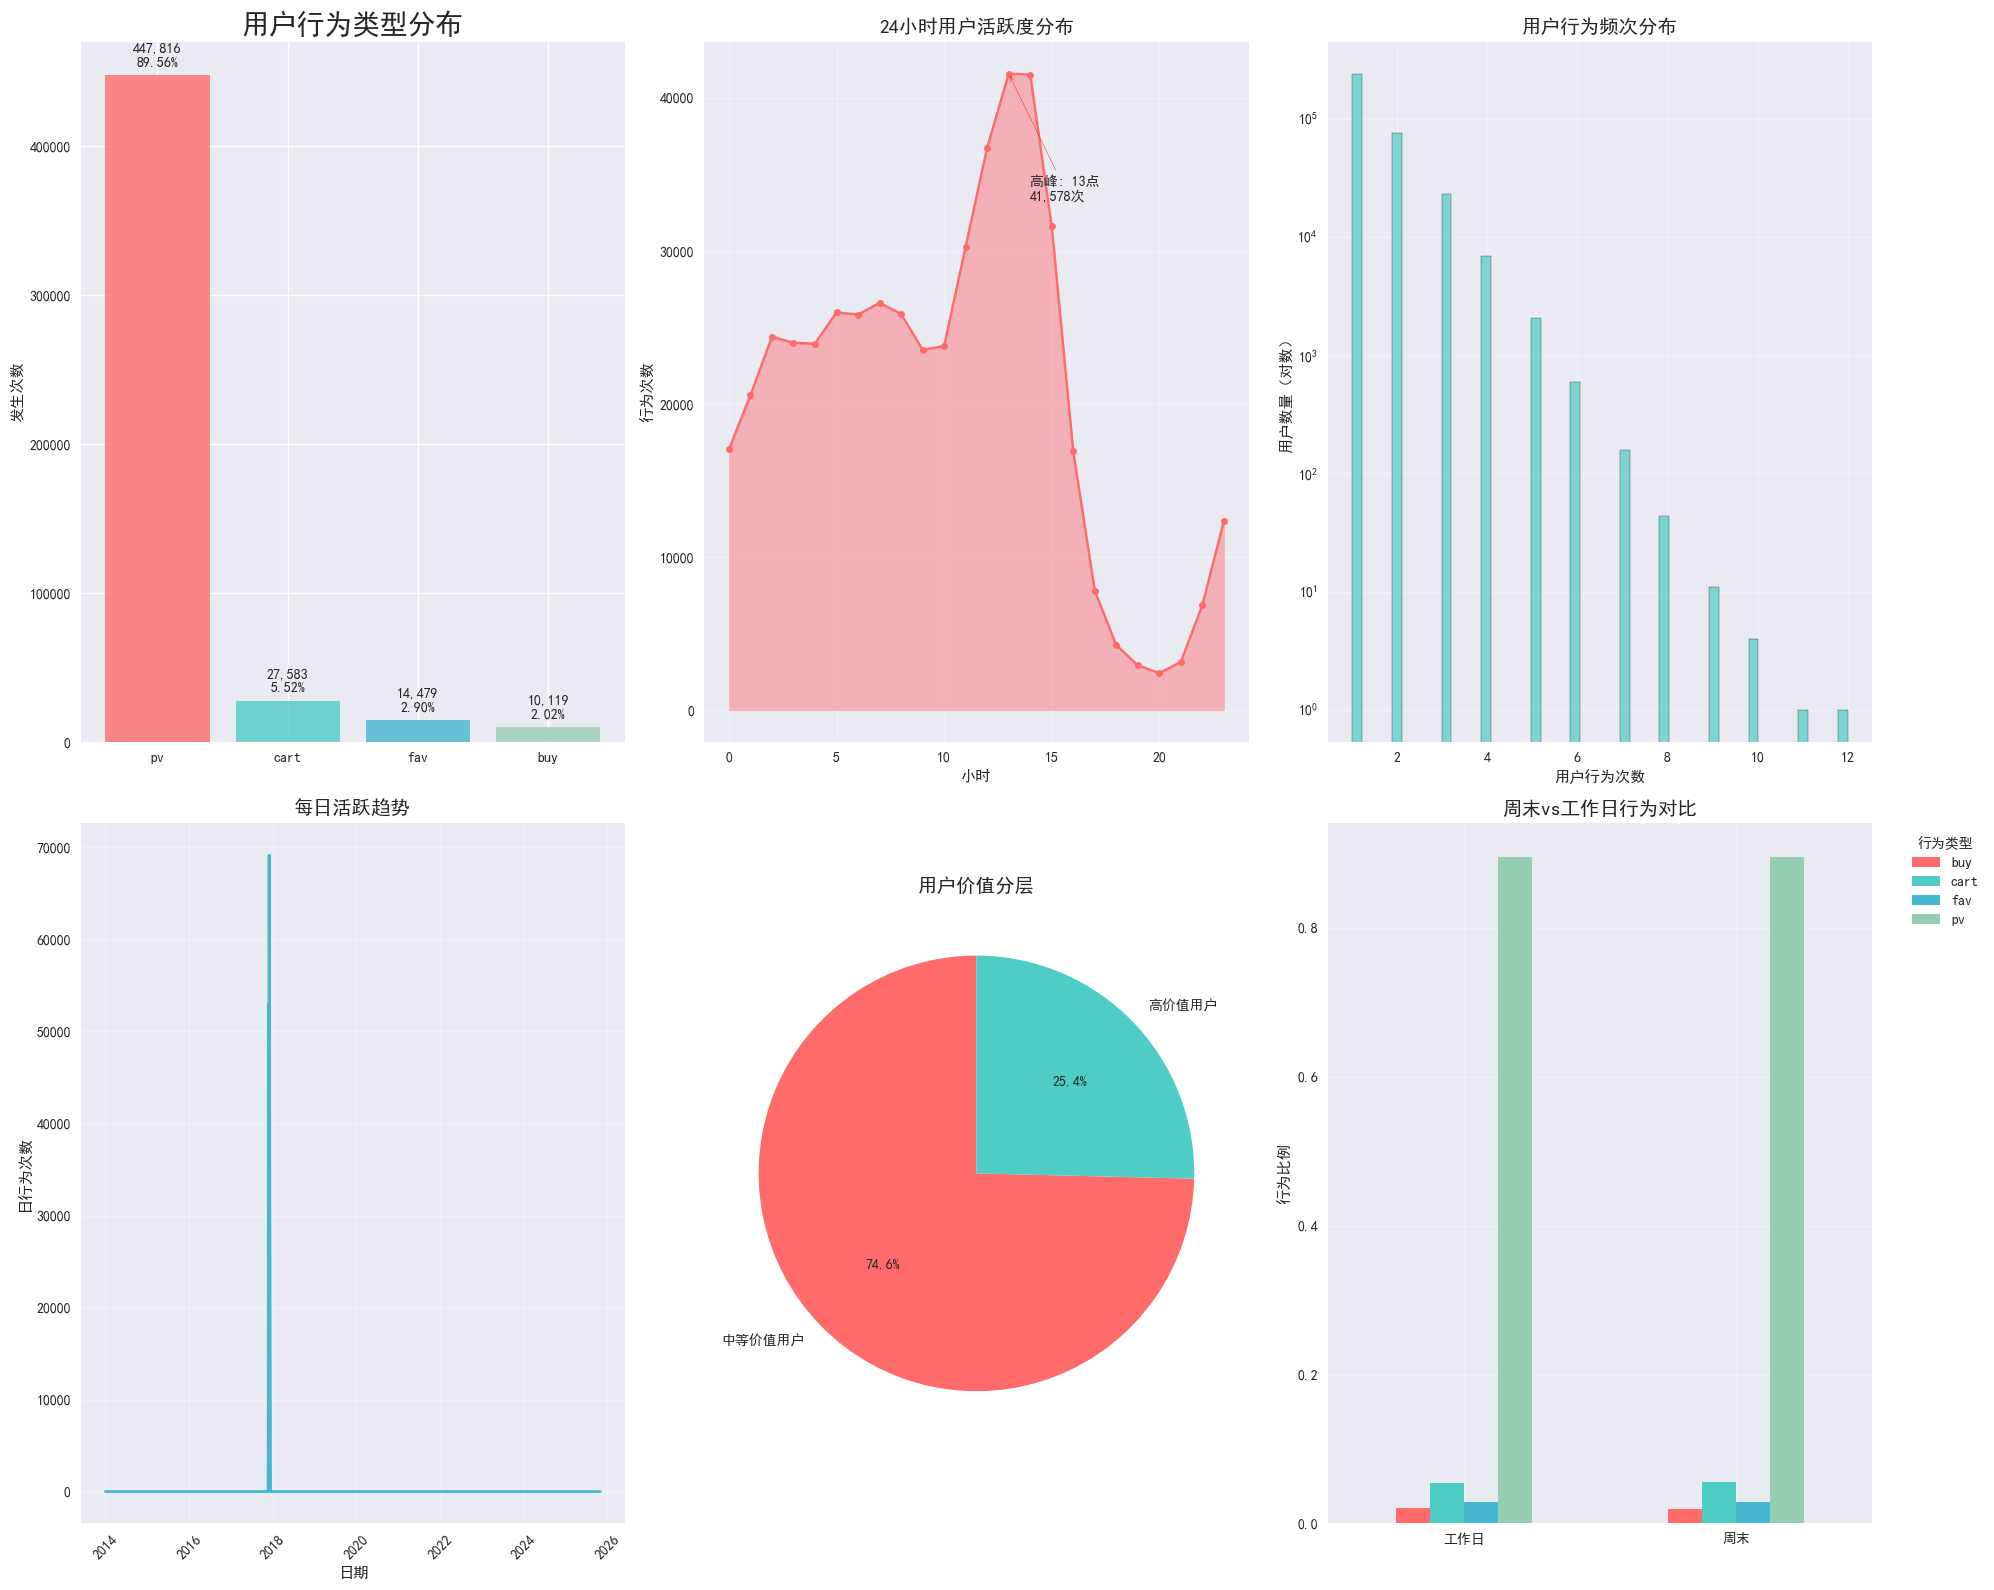

In [7]:
# 单元格7: 数据可视化
print("步骤6: 数据可视化")
data_visualizer.create_eda_plots(df_cleaned, analysis_results, save=True)

In [8]:
# 单元格8: 生成分析报告
print("步骤7: 生成分析报告")

# 创建简单的文本报告
report_content = f"""
# 电商用户行为分析 - 探索性分析报告

## 数据概况
- 分析数据量: {len(df_cleaned):,} 条记录
- 总用户数: {analysis_results['basic']['total_users']:,}
- 总商品数: {analysis_results['basic']['total_items']:,}
- 时间范围: {df_cleaned['datetime'].min()} 到 {df_cleaned['datetime'].max()}

## 关键发现
1. 用户行为以{analysis_results['basic']['behavior_distribution'].index[0]}为主，占比{analysis_results['basic']['behavior_distribution'].iloc[0]/len(df_cleaned)*100:.1f}%
2. 平均每个用户产生{analysis_results['user_analysis']['user_activity']['total_actions'].mean():.1f}次行为
3. 数据覆盖{(df_cleaned['datetime'].max() - df_cleaned['datetime'].min()).days}天用户行为

## 业务建议
- 基于用户行为分布优化产品功能
- 针对不同价值用户制定差异化策略
- 根据时间模式优化资源分配
"""

report_path = PROCESSED_DATA_PATH.parent.parent / "reports" / "analysis_reports" / "探索性分析报告.md"
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report_content)

print(f"✅ 分析报告已生成: {report_path}")


步骤7: 生成分析报告
✅ 分析报告已生成: D:\新建文件夹\电商用户行为分析\reports\analysis_reports\探索性分析报告.md
